# Working With JSON, Array, and Struct

Denormalizing schema into a single table with nested and repeated field

### 1. Connecting BigQuery Jupyter Notebook

Set environment variables for notebook to connect Bigquery

In [1]:
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/Rakyan Prajnagra/Documents/Data Engineer/GCP-DataEngineerLearningPath/Quest-DataWarehouses/Quest-4-JSON-Array-Struct/qwiklabs-gcp-03-0839e0d1d019-b455f8d120d1.json'

Load the BigQuery client library by executing the command below

In [2]:
%load_ext google.cloud.bigquery

### 2. Create a New Dataset

Used to store table for the insights. Create new dataset titled `fruit_store` can be done through SQL query.

In [4]:
%%bigquery
CREATE SCHEMA fruit_store

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)


""


Ecommerce dataset has been created

### 3. Working with Array

Normally in SQL a single value stored for each row. If there any repetitive data in the table, we have to normalization the data. This is a common approach for a transactional database. But for analytical database (data warehousing), we often go the reverse direction-denormalization.

Run the query below.

In [5]:
%%bigquery
SELECT
['raspberry', 'blackberry', 'strawberry', 'cherry'] AS fruit_array

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,fruit_array
0,"[raspberry, blackberry, strawberry, cherry]"


An array is a list of items in brackets []. The result show us those array belong to a single row.

In [6]:
%%bigquery
SELECT
['raspberry', 'blackberry', 'strawberry', 'cherry', 1234567] AS fruit_array

Executing query with job ID: a198b4d8-b64b-49d6-aca4-5cafa793f7fe
Query executing: 0.86s


ERROR:
 400 Array elements of types {INT64, STRING} do not have a common supertype at [2:1]

Location: US
Job ID: a198b4d8-b64b-49d6-aca4-5cafa793f7fe



Why the result shows error? because the data in array must be the same type.

Now try to loading JSON file into BigQuery. The JSON file that we try to ingest is located in the Google Cloud Storage.

In [9]:
%%bigquery
LOAD DATA OVERWRITE fruit_store.fruit_details
FROM FILES (
  format = 'JSON',
  uris = ['gs://data-insights-course/labs/optimizing-for-performance/shopping_cart.json'])

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)


""


The BigQuery will autodetect the schema when we load data from JSON file.

To check the data type in the `fruit_store` table, run the query below.

In [36]:
%%bigquery
SELECT column_name, data_type
FROM `fruit_store.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'fruit_details'
ORDER BY ordinal_position

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,column_name,data_type
0,total_cost,FLOAT64
1,fruit_array,ARRAY<STRING>
2,person,STRING


In the schema, the fruit_array is an array. So BigQuery supports arrays data type. In the BigQuery, arrays are called `REPEATED`.

We can create an array with ARRAY_AGG(). Lets explore the ecommerce dataset before we create array table.

In [10]:
%%bigquery
SELECT
  fullVisitorId,
  date,
  v2ProductName,
  pageTitle
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
ORDER BY date

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,fullVisitorId,date,v2ProductName,pageTitle
0,5710379250208908569,20170731,Google Snapback Hat Black,Google RFID Journal
1,5710379250208908569,20170731,Google Women's Lightweight Microfleece Jacket,Google Snapback Hat Black
2,5710379250208908569,20170801,Android Sticker Sheet Ultra Removable,Office | Google Merchandise Store
3,5710379250208908569,20170801,1 oz Hand Sanitizer,Office | Google Merchandise Store
4,5710379250208908569,20170801,Windup Android,Accessories | Google Merchandise Store
...,...,...,...,...
106,5710379250208908569,20170801,Switch Tone Color Crayon Pen,Office | Google Merchandise Store
107,5710379250208908569,20170801,Micro Wireless Earbud,Electronics | Google Merchandise Store
108,5710379250208908569,20170801,Android Wool Heather Cap Heather/Black,Shop by Brand | Google Merchandise Store
109,5710379250208908569,20170801,Windup Android,Shop by Brand | Google Merchandise Store


Without array, the result return 111 rows.

Time to create the array with previous dataset

In [11]:
%%bigquery
SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,fullVisitorId,date,products_viewed,pages_viewed
0,5710379250208908569,20170731,"[Google Snapback Hat Black, Google Women's Lig...","[Google RFID Journal, Google Snapback Hat Black]"
1,5710379250208908569,20170801,"[Android Sticker Sheet Ultra Removable, Switch...","[Office | Google Merchandise Store, Fun | Acce..."


After using ARRAY_AGG(), the result return 2 rows - one for each day.

To see how many pages were viewed by `1501570398` user on 1 August 2017, execute this query.

In [12]:
%%bigquery
SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(v2ProductName)) AS num_products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(pageTitle)) AS num_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,fullVisitorId,date,products_viewed,num_products_viewed,pages_viewed,num_pages_viewed
0,5710379250208908569,20170731,"[Google Snapback Hat Black, Google Women's Lig...",2,"[Google RFID Journal, Google Snapback Hat Black]",2
1,5710379250208908569,20170801,"[Android Sticker Sheet Ultra Removable, Androi...",109,"[Office | Google Merchandise Store, Office | G...",109


This user viewed 109 pages on one day.

And how many uniques product were viewed?

In [13]:
%%bigquery
SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(DISTINCT v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(DISTINCT v2ProductName)) AS distinct_products_viewed,
  ARRAY_AGG(DISTINCT pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(DISTINCT pageTitle)) AS distinct_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,fullVisitorId,date,products_viewed,distinct_products_viewed,pages_viewed,distinct_pages_viewed
0,5710379250208908569,20170731,"[Google Snapback Hat Black, Google Women's Lig...",2,"[Google RFID Journal, Google Snapback Hat Black]",2
1,5710379250208908569,20170801,"[Android Sticker Sheet Ultra Removable, Androi...",61,"[Office | Google Merchandise Store, Accessorie...",8


2 products on 13 July 2017 and 61 products on 1 August 2017.

On the previous, we already load and create array in BigQuery. Now we want to query the dataset that already have array in it (Public Dataset for Google Analytics).

In [14]:
%%bigquery
SELECT
  *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,<NA>,1,1501570398,1501570840,20170801,"{'visits': 1, 'hits': 11, 'pageviews': 11, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 4, 'time': 0, 'hour': 0, 'minut...",0187975600071346667,None,None,Organic Search,Not Socially Engaged


The dataset contains a lot of array and struct (we will discover later). This can be overwhelming for analysis.

So just select some fields.

In [16]:
%%bigquery
SELECT
  visitId,
  hits.page.pageTitle
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398

Executing query with job ID: ddcc9d0d-2515-4b74-a763-c0bc416df900
Query executing: 0.94s


ERROR:
 400 Cannot access field page on a value with type ARRAY<STRUCT<hitNumber INT64, time INT64, hour INT64, ...>> at [3:8]

Location: US
Job ID: ddcc9d0d-2515-4b74-a763-c0bc416df900



When we try exectuing the query, it shows error message. What wrong with the query? because we can't query REPEATED field mormally. We must break the array first.

Use UNNEST() function on the array fields.

In [17]:
%%bigquery
SELECT DISTINCT
  visitId,
  h.page.pageTitle
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
UNNEST(hits) AS h
WHERE visitId = 1501570398
LIMIT 10

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,visitId,pageTitle
0,1501570398,Fun | Accessories | Google Merchandise Store
1,1501570398,Home
2,1501570398,Shop by Brand | Google Merchandise Store
3,1501570398,Office | Google Merchandise Store
4,1501570398,Other | Office | Google Merchandise Store
5,1501570398,Writing Instruments | Office | Google Merchand...
6,1501570398,Accessories | Google Merchandise Store
7,1501570398,Electronics | Google Merchandise Store
8,1501570398,Apparel | Google Merchandise Store


Thats the result when we break the array, it become many rows.

### 4. Working with Struct

On previous query, we try to select hit.page.pageTitle. This field is one of STRUCT data type. It used to grouping related fields togehter. So basically it's a 3 different fields. To understand STRUCT, lets try analyze the dataset.

In [18]:
%%bigquery
SELECT
  visitId,
  totals.*,
  device.*
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398
LIMIT 10

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,visitId,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,screenviews,...,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,javaEnabled,language,screenColors,screenResolution,deviceCategory
0,1501570398,1,11,11,731,<NA>,<NA>,<NA>,1,<NA>,...,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,<NA>,not available in demo dataset,not available in demo dataset,not available in demo dataset,tablet


The .* syntax tells BigQuery to return all fields for that STRUCT. The advantage of having many STRUCT in a single table is it allows us to run queries without having to do any JOIN. 

Run the query below to try the STRUCT syntax.

In [19]:
%%bigquery
#standardSQL
SELECT STRUCT("Rudisha" as name, 23.4 as split) as runner

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,runner
0,"{'name': 'Rudisha', 'split': 23.4}"


The result will be shown like this in BigQuery

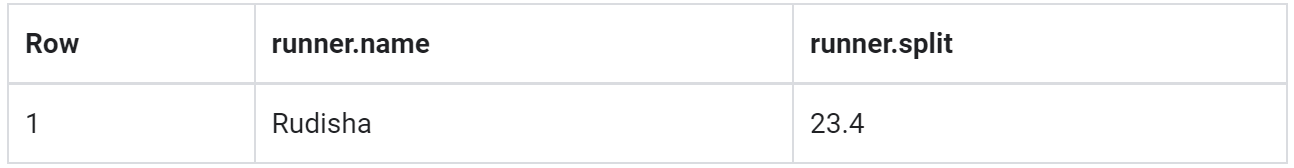

Now try the query below.

In [20]:
%%bigquery
SELECT STRUCT("Rudisha" as name, [23.4, 26.3, 26.4, 26.1] as splits) AS runner

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,runner
0,"{'name': 'Rudisha', 'splits': [23.4, 26.3, 26...."


We conclude that structs are containers that can have multiple field names and data types nested inside, while arrays can be one of the field types inside of a struct.

We want to discover more about STRUCT. First create a new dataset titled `racing`.

In [21]:
%%bigquery
CREATE SCHEMA racing

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)


""


Then load a JSON file into our new dataset.

In [24]:
%%bigquery
LOAD DATA OVERWRITE racing.race_results
FROM FILES (
  format = 'JSON',
  uris = ['gs://data-insights-course/labs/optimizing-for-performance/race_results.json'])

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)


""


Check for the schema.

In [35]:
%%bigquery
SELECT column_name, data_type
FROM `racing.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'race_results'
ORDER BY ordinal_position

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,column_name,data_type
0,participants,"ARRAY<STRUCT<splits ARRAY<FLOAT64>, name STRING>>"
1,race,STRING


The participant field is STRUCT. In BigQuery STRUCT is called RECORD. From the schema, which field is the array? the participants.splits is the answer.

Let see our data in race_results table.

In [25]:
%%bigquery
SELECT * FROM racing.race_results

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,participants,race
0,"[{'splits': [23.4, 26.3, 26.4, 26.1], 'name': ...",800M


There are some runners with the race time on 800m race.

We can find the name of each runner by executing this query.

In [28]:
%%bigquery
SELECT race, participants.name
FROM racing.race_results
CROSS JOIN
race_results.participants

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,race,name
0,800M,Rudisha
1,800M,Makhloufi
2,800M,Murphy
3,800M,Bosse
4,800M,Rotich
5,800M,Lewandowski
6,800M,Kipketer
7,800M,Berian


We can modify the query by replacing CROSS JOIN with a comma.

In [29]:
%%bigquery
SELECT race, participants.name
FROM racing.race_results AS r, r.participants

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,race,name
0,800M,Rudisha
1,800M,Makhloufi
2,800M,Murphy
3,800M,Bosse
4,800M,Rotich
5,800M,Lewandowski
6,800M,Kipketer
7,800M,Berian


It shows the same result.

Use COUNT syntax to know how many runner take a part in this race.

In [31]:
%%bigquery
SELECT COUNT(p.name) AS racer_count
FROM racing.race_results AS r, UNNEST(r.participants) AS p

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,racer_count
0,8


There are 8 runner on 800m race.

Lets go deeper. We want to list the total race time for racers whose names begin with R.

In [33]:
%%bigquery
SELECT
  p.name,
  SUM(split_times) as total_race_time
FROM racing.race_results AS r
, UNNEST(r.participants) AS p
, UNNEST(p.splits) AS split_times
WHERE p.name LIKE 'R%'
GROUP BY p.name
ORDER BY total_race_time ASC

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,name,total_race_time
0,Rudisha,102.2
1,Rotich,103.6


There are 2 runner name begin with R. To do this query we have to unpacking the array with UNNEST().

We can filter the data array data type. Check the query below

In [34]:
%%bigquery
SELECT
  p.name,
  split_time
FROM racing.race_results AS r
, UNNEST(r.participants) AS p
, UNNEST(p.splits) AS split_time
WHERE split_time = 23.2;

c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\job\query.py:1799: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
c:\Users\Rakyan Prajnagra\Documents\Data Engineer\GCP-DataEngineerLearningPath\dev-env\Lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,name,split_time
0,Kipketer,23.2
